In [7]:
%matplotlib inline

import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys

if "../" not in sys.path:
  sys.path.append("../") 

from collections import defaultdict
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [8]:
env = WindyGridworldEnv()

In [9]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [36]:
def sarsa(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    SARSA algorithm: On-policy TD control. Finds the optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Lambda time discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, stats).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    

    for i_episode in range(num_episodes):
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()
        episode = []
        total_reward = 0
        state = env.reset()
        action = np.random.choice(a=list(range(env.nA)), p=policy(state))
        done = False
        while not done:
            #take action
            
            #print(state)
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            episode.append((state, action, reward, next_state))
            next_action = np.random.choice(a=list(range(env.nA)), p=policy(next_state))           
            # refactor towards more readability
            td_target = reward + discount_factor * Q[next_state][next_action]
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error
            state = next_state
            action = next_action
        
        if(done):
            print(total_reward)
            stats.episode_lengths[i_episode] = len(episode)
            stats.episode_rewards[i_episode] = total_reward
                
    return Q, stats

In [37]:
Q, stats = sarsa(env, 200)

-1145.0
-90.0
-77.0
-251.0
-173.0
-81.0
-166.0
-33.0
-96.0
-107.0
-27.0
-65.0
-93.0
-100.0
-108.0
-34.0
-31.0
-122.0
-52.0
-22.0
-31.0
-26.0
-259.0
-99.0
-38.0
-98.0
-48.0
-78.0
-50.0
-37.0
-32.0
-27.0
-44.0
-111.0
-87.0
-57.0
-86.0
-36.0
-64.0
-30.0
-90.0
-29.0
-69.0
-35.0
-85.0
-89.0
-49.0
-33.0
-52.0
-35.0
-36.0
-41.0
-55.0
-31.0
-26.0
-55.0
-35.0
-31.0
-30.0
-25.0
-65.0
-35.0
-23.0
-25.0
-19.0
-55.0
-31.0
-27.0
-37.0
-36.0
-27.0
-32.0
-64.0
-33.0
-36.0
-28.0
-48.0
-28.0
-26.0
-40.0
-36.0
-17.0
-35.0
-36.0
-38.0
-26.0
-39.0
-27.0
-16.0
-29.0
-22.0
-19.0
-17.0
-23.0
-25.0
-22.0
-15.0
-29.0
-21.0
Episode 100/200.-24.0
-26.0
-19.0
-30.0
-17.0
-29.0
-31.0
-23.0
-31.0
-22.0
-25.0
-19.0
-32.0
-19.0
-15.0
-20.0
-35.0
-23.0
-29.0
-21.0
-19.0
-16.0
-18.0
-23.0
-25.0
-25.0
-28.0
-19.0
-25.0
-22.0
-35.0
-20.0
-21.0
-26.0
-20.0
-34.0
-23.0
-21.0
-15.0
-19.0
-24.0
-17.0
-28.0
-22.0
-21.0
-15.0
-24.0
-16.0
-18.0
-21.0
-24.0
-20.0
-15.0
-38.0
-21.0
-19.0
-17.0
-19.0
-32.0
-31.0
-31.0
-21.0
-28.0
-

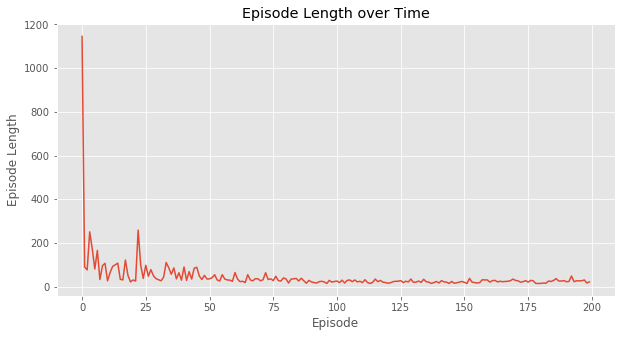

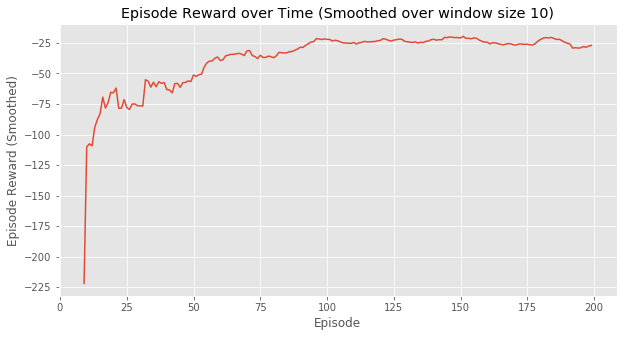

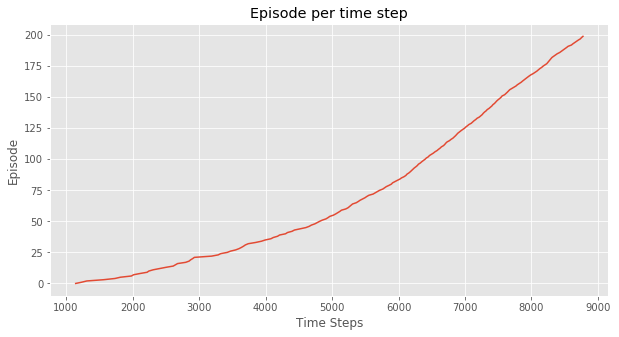

(<matplotlib.figure.Figure at 0x7f21c6575fd0>,
 <matplotlib.figure.Figure at 0x7f21c6520ac8>)

In [38]:
plotting.plot_episode_stats(stats)